In [153]:
import pandas as pd
import numpy as np
import requests
import matplotlib.image as mpimg
import csv
import io
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
import tweepy
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import seaborn as sns

# Gathering Data

### Creating'twitter_archive' file

In [154]:
twitter_archive = pd.read_csv('Weratedogs/twitter-archive-enhanced.csv') # Reading the dataset 
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [155]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Accessing API

### Creating 'api_df_now' file

In [156]:
# Reading data from json file and inserting data into an empty list
df_list = []

with open('Weratedogs/tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'user_count'])
api_df_now.count()

tweet_id          2354
retweet_count     2354
favorite_count    2354
user_count        2354
dtype: int64

### Creating 'Prediction' file

In [157]:
# importing and saving neural network's prediction data and laoding image prediction file
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
prediction = pd.read_csv(io.StringIO(r.decode('utf-8')), sep = '\t')
prediction.to_csv('prediction.tsv')
print('prediction shape', prediction.shape)
prediction.head()
prediction.to_csv('image_predictions.tsv', sep='\t', index = False) 

prediction shape (2075, 12)


In [158]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [159]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assessing Data

In [160]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [161]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [162]:
twitter_archive.in_reply_to_status_id.value_counts().head()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
Name: in_reply_to_status_id, dtype: int64

In [163]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [164]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [165]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [166]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [167]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [168]:
# Check rating numerator stats
twitter_archive.rating_numerator.value_counts().head(40)

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [169]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 8, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 17, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 165, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 420, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text'])

599     RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
745     RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…
764     RT @dog_rates: Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://…
835     Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq 
859     This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU              
                                                                     ...                                                                            
2315    This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4Tqvvku

In [170]:
# Check previous tweets for missing numerator data.
print(twitter_archive['text'][2355]) 
print(twitter_archive['text'][55]) 
print(twitter_archive['text'][902]) 
print(twitter_archive['text'][2074]) 
print(twitter_archive['text'][189])

Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


In [171]:
# Check standard rating denominator stats
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [172]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 20, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 70, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 110, 'text'])

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                        
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object
433    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object


In [173]:
# Check previous tweets for missing denominator data.
print(twitter_archive['text'][2335]) 
print(twitter_archive['text'][516]) 
print(twitter_archive['text'][1165]) 
print(twitter_archive['text'][1598]) 
print(twitter_archive['text'][433]) 
print(twitter_archive['text'][1635])

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [174]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [175]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [176]:
# Check image prediction p1 counts 
prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
pitcher               1  
bighorn               1  
hummingbird           1  
book_jacket           1  
polecat               1  
Name: p1, Length: 378, dtype: int64

In [177]:
# Check other creatures or objects which isn't dogs
not_dogs = prediction.groupby('p1').filter(lambda x: len(x) < 3)

In [178]:
# counting not dogs images
len(not_dogs)

271

In [179]:
not_dogs.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
605,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,EntleBucher,0.523206,True,Greater_Swiss_Mountain_dog,0.431657,True,Appenzeller,0.044208,True
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,sunglasses,0.900864,False,sunglass,0.040291,False,snorkel,0.009333,False
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True


In [180]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [181]:
api_df_now.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [182]:
api_df_now.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [183]:
api_df_now.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
user_count        0
dtype: int64

In [184]:
# sample of highest retweet_count 
api_df_now.sort_values(['retweet_count'], ascending= 0)[0:5] 

,tweet_id,retweet_count,favorite_count,user_count
1037,744234799360020481,79515,131075,3200943
259,842892208864923648,56625,0,3200891
533,807106840509214720,56625,107015,3200896
816,770743923962707968,52360,0,3200905
1077,739238157791694849,52360,75163,3200943


In [185]:
api_df_now = api_df_now.drop_duplicates()
# no missing valyues and all data type is integer

In [186]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 92.0 KB


# Cleaning Data

## Quality Issues

In [187]:
# generating new tables for cleaning
twitter_archive_clean = twitter_archive.copy()
prediction_clean = prediction.copy()
api_df_now_clean = api_df_now.copy()

### 1- Unnecessary 'twitter_archive'data which has missing data

In [188]:
# Dropping unnecessary columns
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

### `Testing`

In [189]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 2- Missing values

In [190]:
# Replacing missing (none) values with NaN
twitter_archive_clean =  twitter_archive_clean.replace('None', np.nan)

In [191]:
twitter_archive_clean.isnull().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         59  
rating_numerator      0   
rating_denominator    0   
name                  745 
doggo                 2259
floofer               2346
pupper                2099
puppo                 2326
dtype: int64

In [192]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                1611 non-null   object
 8   doggo               97 non-null     object
 9   floofer             10 non-null     object
 10  pupper              257 non-null    object
 11  puppo               30 non-null     object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 3- Joining 'api_df_now' table data into 'twitter_archive' table data

In [193]:
# Renaming "id" column
api_df_now.rename(columns={'id': 'tweet_id'}, inplace = True)

print(twitter_archive_clean.tweet_id.count())
print(api_df_now.tweet_id.count())


2356
2354


In [194]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_df_now, on='tweet_id', how = 'inner')

### `Testing`

In [195]:
twitter_archive_clean.tweet_id.count()

2354

In [196]:
# Dropping duplicates
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [197]:
print(twitter_archive_clean.tweet_id.count())
print(api_df_now.tweet_id.count())

2354
2354


In [198]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   timestamp           2354 non-null   object
 2   source              2354 non-null   object
 3   text                2354 non-null   object
 4   expanded_urls       2295 non-null   object
 5   rating_numerator    2354 non-null   int64 
 6   rating_denominator  2354 non-null   int64 
 7   name                1610 non-null   object
 8   doggo               97 non-null     object
 9   floofer             10 non-null     object
 10  pupper              256 non-null    object
 11  puppo               30 non-null     object
 12  retweet_count       2354 non-null   int64 
 13  favorite_count      2354 non-null   int64 
 14  user_count          2354 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 294.2+ KB


### 4- Dogs naming confusion

In [199]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,user_count


In [200]:
# loop to replace all the 'None' values before cat
dog = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
        

In [201]:
# use cat to combine 
twitter_archive_clean['dog'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['dog'] = twitter_archive_clean['dog'].replace('', np.nan)

### `Testing`

In [202]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,dog
626,794983741416415232,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq,"https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1",12,10,Rizzy,3942,0,3200900,NaN
1071,739932936087216128,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,https://twitter.com/dog_rates/status/739932936087216128/photo/1,10,10,Rorie,1217,4443,3200943,NaN
2224,668274247790391296,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sophie. Her son just got in the car to leave for college. Very touching. Perfect dramatic sunlight. 10/10 yaass https://t.co/3j9kZRcpVB,https://twitter.com/dog_rates/status/668274247790391296/photo/1,10,10,Sophie,248,886,3201015,NaN
2227,668248472370458624,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Bisquick. He is a Brown Douglass Fir terrier. Very inbred. Looks terrified. 8/10 still cute tho https://t.co/1XYRh8N00K,https://twitter.com/dog_rates/status/668248472370458624/photo/1,8,10,Bisquick,523,1056,3201015,NaN
1006,747594051852075008,2016-06-28 00:54:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr,https://twitter.com/dog_rates/status/747594051852075008/photo/1,11,10,NaN,1205,4065,3200943,NaN


In [203]:
print(twitter_archive_clean.shape)
print(twitter_archive.shape)

(2354, 12)
(2356, 17)


In [204]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2354 non-null   int64  
 1   timestamp           2354 non-null   object 
 2   source              2354 non-null   object 
 3   text                2354 non-null   object 
 4   expanded_urls       2295 non-null   object 
 5   rating_numerator    2354 non-null   int64  
 6   rating_denominator  2354 non-null   int64  
 7   name                1610 non-null   object 
 8   retweet_count       2354 non-null   int64  
 9   favorite_count      2354 non-null   int64  
 10  user_count          2354 non-null   int64  
 11  dog                 0 non-null      float64
dtypes: float64(1), int64(6), object(5)
memory usage: 239.1+ KB


### 5- Changing timestamp to datetime

In [205]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### `Testing`

In [206]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### 6- Optimizing source of content

In [207]:
twitter_archive_clean['source'].value_counts()

# Source: Twitter for iphone / Vine - Make a Scene / Twitter Web Client / TweetDeck

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [208]:
# Unifing source of content
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

### `Testing`

In [209]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     2219
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

### 7- Numerator and denominator deafult values

In [210]:

twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   int64              
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2295 non-null   object             
 5   rating_numerator    2354 non-null   float64            
 6   rating_denominator  2354 non-null   float64            
 7   name                1610 non-null   object             
 8   retweet_count       2354 non-null   int64              
 9   favorite_count      2354 non-null   int64              
 10  user_count          2354 non-null   int64              
 11  dog                 0 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64

In [211]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\pc1\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
44,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
339,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.00,10.0
694,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
762,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1687,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1710,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [212]:
#CODE: Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
432,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
783,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,11.0
900,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1118,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1226,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1252,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1272,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1349,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1431,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1632,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0


In [213]:
# Create new column in float data type
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

# Checking with a sample
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,dog,rating
255,843981021012017153,2017-03-21 00:22:10+00:00,Twitter for iphone,HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/10 https://t.co/Gu5wHx3CBd,https://twitter.com/brianstack153/status/796796054100471809,13.0,10.0,NaN,3285,16327,3200891,NaN,13.0
1530,690005060500217858,2016-01-21 02:56:40+00:00,Twitter for iphone,"""I'm the only one that ever does anything in this household"" 10/10 https://t.co/V8HcVIh4jt",https://twitter.com/dog_rates/status/690005060500217858/photo/1,10.0,10.0,NaN,1907,4004,3200950,NaN,10.0
975,750011400160841729,2016-07-04 17:00:26+00:00,TweetDeck,Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM,https://twitter.com/dog_rates/status/750011400160841729/photo/1,11.0,10.0,Piper,1035,3568,3200943,NaN,11.0
1534,689905486972461056,2016-01-20 20:21:00+00:00,Twitter for iphone,"Say hello to Gizmo. He's quite the pupper. Confused by bed, but agile af. Can barely catch on camera. 11/10 so quick https://t.co/IE4ZblyZRY","https://twitter.com/dog_rates/status/689905486972461056/photo/1,https://twitter.com/dog_rates/status/689905486972461056/photo/1,https://twitter.com/dog_rates/status/689905486972461056/photo/1,https://twitter.com/dog_rates/status/689905486972461056/photo/1",11.0,10.0,Gizmo,787,2651,3200950,NaN,11.0
2060,671163268581498880,2015-11-30 03:06:07+00:00,Twitter for iphone,Pack of horned dogs here. Very team-oriented bunch. All have weird laughs. Bond between them strong. 8/10 for all https://t.co/U7DQQdZ0mX,https://twitter.com/dog_rates/status/671163268581498880/photo/1,8.0,10.0,NaN,1198,1763,3201008,NaN,8.0


### `Testing numerator`

In [214]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,dog,rating
1066,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,9220,20648,3200943,NaN,14.0


### `Testing denominator`

In [215]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,dog,rating
1066,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,9220,20648,3200943,NaN,14.0


### 8- Capitalizing dog's first letter names

In [216]:
twitter_archive_clean['name'].str.islower().sum()

109

In [217]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

### `Testing`

In [218]:
twitter_archive_clean['name'].str.islower().sum()

0

## Tidiness

### 1- Image prediction p1, p2 ,p3 names

In [219]:
# Renaming columns
prediction_clean= prediction_clean.rename(columns={'p1':'potential_dog1', 'p2':'potential_dog2', 'p3':'potential_dog3'})

### `Testing`

In [220]:
prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,potential_dog1,p1_conf,p1_dog,potential_dog2,p2_conf,p2_dog,potential_dog3,p3_conf,p3_dog
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,1,Saint_Bernard,0.342571,True,boxer,0.289096,True,Pembroke,0.076463,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False


In [221]:
# Define: Exclude all rows with P1_confidence less than 0.5
prediction_clean = prediction_clean[prediction_clean['p1_conf'] > 0.5 ]

### `Testing`


In [222]:
assert [prediction_clean[prediction_clean['p1_conf'] > 0.5 ]]

### 2- Merging documents to form a working dataframe

In [223]:
final_merge = pd.merge(twitter_archive_clean, prediction_clean, how='outer', on=['tweet_id'])

In [224]:
final_merge = pd.merge(final_merge, api_df_now_clean, how = 'outer', on=['tweet_id'])

In [225]:
# final merge Check
final_merge

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count_x,favorite_count_x,...,p1_dog,potential_dog2,p2_conf,p2_dog,potential_dog3,p3_conf,p3_dog,retweet_count_y,favorite_count_y,user_count_y
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853.0,39467.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853.0,39467.0,3200889.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514.0,33819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6514.0,33819.0,3200889.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328.0,25461.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,3200889.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964.0,42908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964.0,42908.0,3200889.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774.0,41048.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,3200889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,888202515573088257,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN,NaN
2351,835246439529840640,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2259.0,3200891.0
2352,832088576586297345,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,72.0,3200892.0
2353,686035780142297088,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,1274.0,3200950.0


# Storing Data

In [228]:
twitter_archive_clean.to_csv('Weratedogs/twitter-archive-enhanced.csv', encoding='utf-8')

# Visuals

Twitter for iphone     2214
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64


Text(0.5, 1.0, 'Distribution')

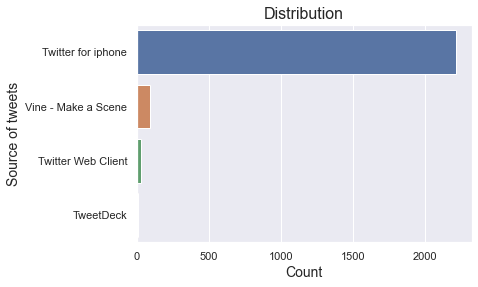

In [253]:
sorted_source = twitter_archive_clean['source'].value_counts().index
print(twitter_archive_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source of tweets', fontsize=14)
plt.title('Distribution',fontsize=16)


#### This graph above for the distribution of sources from which these data was gathered. Most of of tweets is from iPhone twitter app, around 94% in the total, unlike other sources like Vine, Twitter web, and TweetDeck which had less popularity.

In [240]:
twitter_archive_clean.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,dog,rating
tweet_id,1.000000,0.041406,-0.026333,0.390988,0.529374,-0.870521,NaN,0.046864
rating_numerator,0.041406,1.000000,0.180959,0.005393,0.004039,-0.032150,NaN,0.983154
rating_denominator,-0.026333,0.180959,1.000000,-0.021469,-0.022129,0.009926,NaN,-0.001560
retweet_count,0.390988,0.005393,-0.021469,1.000000,0.702713,-0.358854,NaN,0.009392
favorite_count,0.529374,0.004039,-0.022129,0.702713,1.000000,-0.439268,NaN,0.008109
user_count,-0.870521,-0.032150,0.009926,-0.358854,-0.439268,1.000000,NaN,-0.034445
dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,0.046864,0.983154,-0.001560,0.009392,0.008109,-0.034445,NaN,1.000000


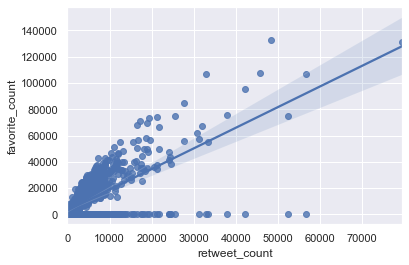

In [255]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)

#### This plot is showing number of retweets vs favorite tweets counts, Which shows the correlation between ‘retweet_count’ and ‘favorite_count’. Some high values are showing a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. 

In [246]:
prediction['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
cocker_spaniel        30 
Name: p1, dtype: int64

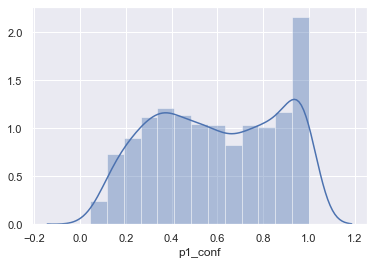

In [252]:
sns.set(style='darkgrid')
ax = sns.distplot(prediction['p1_conf'])

In [251]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### The above plot is showing the top 10 dog breeds on the account. Golden retriever and Labrador retriever topped the list, which are the most common breeds in U.S.